## <font style='font-size: 30px;'> Avaliação do modelo de primeira ordem </font> <hr style='line: 2px solid;'>

A função de transferência média da planta de nível 1 é dada por:

$$ \frac{K}{\tau s+1} = \frac{0.9}{63s+1} → \frac{0.9/63}{s+1/63} $$

Essa é uma função de primeira ordem que possui um erro no estado estacionário de 0.9 (basta fazer s→0), como podemos ver:


                  Malha fechada s/controle
RiseTime                          71.7217
SettlingTime                     131.8753
SettlingMin                        0.4263
SettlingMax                        0.4737
Overshoot                          0.0000
Undershoot                         0.0000
Peak                               0.4732
PeakTime                         229.0466
SteadyStateValue                   0.4737
Erro(%)                            0.5263


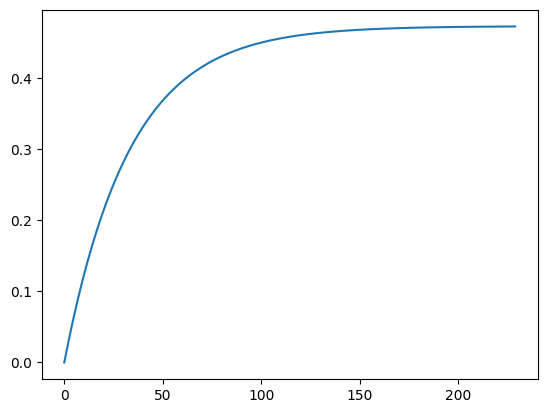

In [3]:
planta_nivel_1 = ct.TransferFunction([0.9/63],[1,1/63])
planta_nivel_1_fechada = ct.feedback(planta_nivel_1, 1)


# Plot da resposta ao degrau
degrau_simulado({"Malha fechada s/controle":[planta_nivel_1_fechada.num, planta_nivel_1_fechada.den]}, show=True)
degrau_simulado_info({"Malha fechada s/controle":[planta_nivel_1_fechada.num, planta_nivel_1_fechada.den]})

Para iniciar o projeto, devemos perseguir os seguintes requisitos:

- $e_{ss} = 0$
- $Mp = 5%$
- $T_s (2\%) = 120 $

## <font style='font-size: 30px;'> Definição do par complexo conjugado para produzir suas especificações </font> <hr style='line: 2px solid;'>

O procedimento pelo lugar das raizes consiste no seguinte:

In [140]:
s = obter_conjulgados_dominantes(Mp=0.01, Ts=100)
print(s[0])
print(s[1])

(-0.04+0.027j)
(-0.04-0.027j)


## <font style='font-size: 30px;'> Calculando posição do polo na origem e  defaseagem angular a ser compensada </font> <hr style='line: 2px solid;'>

A função abaixo fará exatamente isso. Ela pega um sistema G(s) — dado em uma lista de coeficientes $den$ e $num$ — e um polo complexo do par de polos complexos conjugados desejado. A função calcula a o angulo de cada polo e calcula a defasagem.

In [141]:
obter_defasagem_angular([0.9/63],[1,1/63], s[0])

1° Polo faz 131.78 com o S
2° Polo faz 145.98 com o S
 
 Zero precisa somar: 97.8


## <font style='font-size: 30px;'> Defina um zero e um ganho para obter seu controlador </font> <hr style='line: 2px solid;'>

Agora, para o mesmo sistema, com o mesmo polo complexo, utilizamos a função 'obter_controlador_pi' que irá retorar o controlador PI necessário para compensar o angulo necessário. 

In [142]:
num, den = obter_controlador_pi(num=[0.9/63], den=[1, 1/63], s=s[0])

    → Zero: 0.0363
    → Ti : 27.5471
    → Kc : 4.4885
    → BP : 222.7912 
    → Ti : 275.4710

 CONTROLADOR : 
 
4.489 s + 0.1629
----------------
       s


 MALHA S/CONTROLADOR : 
 
  0.01429
-----------
s + 0.01587


 MALHA C/CONTROLADOR : 
 
0.06412 s + 0.002328
--------------------
  s^2 + 0.01587 s



## <font style='font-size: 30px;'> Verifique o lugar das raízes </font> <hr style='line: 2px solid;'>

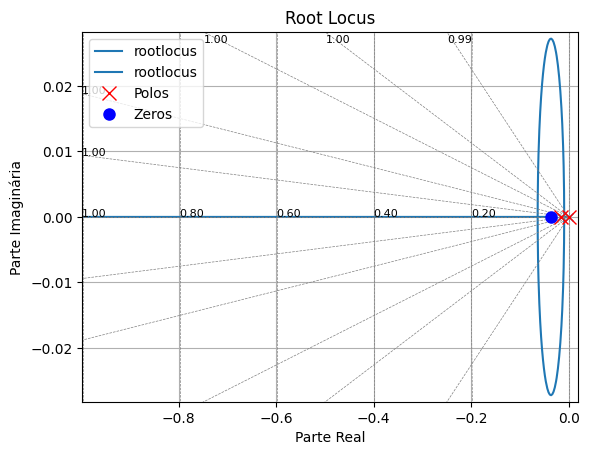


 Polos : 
-0.0159+0.0000j
0.0000+0.0000j

 Zeros : 
-0.0363+0.0000j


In [143]:
obter_lugar_raizes(num, den)

## <font style='font-size: 30px;'> Simule a resposta ao degrau </font> <hr style='line: 2px solid;'>


                  Malha fechada c/controle
RiseTime                          22.6785
SettlingTime                     104.6701
SettlingMin                        0.9084
SettlingMax                        1.0894
Overshoot                          8.9354
Undershoot                         0.0000
Peak                               1.0894
PeakTime                          52.3350
SteadyStateValue                   1.0000
Erro(%)                            0.0000


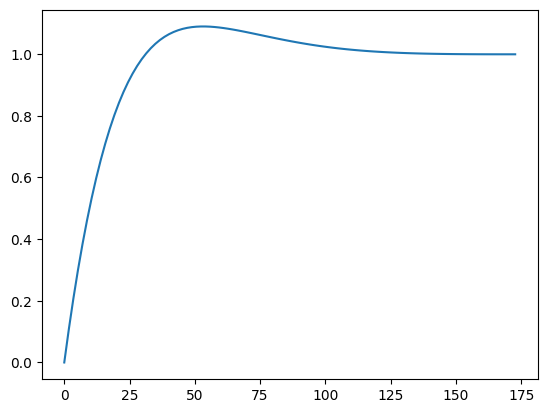

In [144]:
# Construção dos objetos 'TransferFunction'
malha_aberta = ct.TransferFunction(num, den)
malha_fechada = ct.feedback(malha_aberta, 1)

# Plot da resposta ao degrau
degrau_simulado({"Malha fechada c/controle":[malha_fechada.num, malha_fechada.den]}, show=True)
degrau_simulado_info({"Malha fechada c/controle":[malha_fechada.num, malha_fechada.den]})



## <font style='font-size: 30px;'> Reajuste </font> <hr style='line: 2px solid;'>

In [306]:
num, den = obter_controlador_pi(num=[0.9/63], den=[1, 1/63], s=s[0], zero=0.0363, delta=-0.018)

    → Zero: 0.0183
    → Ti : 54.6448
    → Kc : 2.5478
    → BP : 392.5015 
    → Ti : 546.4481

 CONTROLADOR : 
 
2.548 s + 0.04662
-----------------
        s


 MALHA S/CONTROLADOR : 
 
  0.01429
-----------
s + 0.01587


 MALHA C/CONTROLADOR : 
 
0.0364 s + 0.0006661
--------------------
  s^2 + 0.01587 s



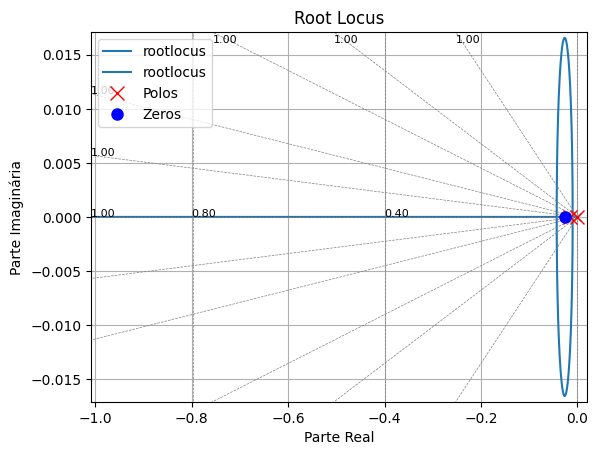


 Polos : 
-0.0159+0.0000j
0.0000+0.0000j

 Zeros : 
-0.0263+0.0000j


In [270]:
obter_lugar_raizes(num, den)


                  Malha fechada
RiseTime               53.8798
SettlingTime           85.5738
SettlingMin             0.9016
SettlingMax             1.0089
Overshoot               0.8939
Undershoot              0.0000
Peak                    1.0089
PeakTime              142.6230
SteadyStateValue        1.0000
Erro(%)                 0.0000


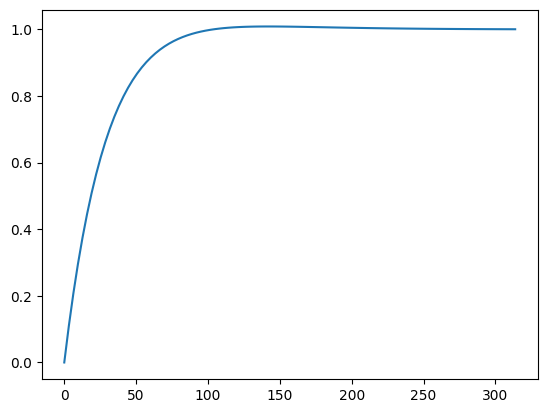

In [307]:
# Construção dos objetos 'TransferFunction'
malha_aberta = ct.TransferFunction(num, den)
malha_fechada = ct.feedback(malha_aberta, 1)

# Plot da resposta ao degrau
degrau_simulado({"Malha fechada":[malha_fechada.num, malha_fechada.den]}, show=True)
degrau_simulado_info({"Malha fechada":[malha_fechada.num, malha_fechada.den]})

## <font style='font-size: 30px;'> Comparação dos dados </font> <hr style='line: 2px solid;'>

> Tratamento dos dados

In [173]:
# Lê o arquivo de texto
df = pd.read_csv('nivel', delimiter=';', parse_dates=[['$Date', '$Time']], dayfirst=True)

# Calcula o intervalo de tempo em segundos a partir do primeiro registro
df['Intervalo'] = (df['$Date_$Time'] - df['$Date_$Time'].iloc[0]).dt.total_seconds()

# Reordena as colunas e remove as colunas de data e tempo originais
df = df[['Intervalo', 'VP', 'SP', 'SC']]

# Salva o DataFrame em um novo arquivo CSV
df.to_csv('nivel-alterado.csv', index=False)

In [310]:
_, _, _, sinais = obter_dados_estruturados4('nivel-alterado.csv')

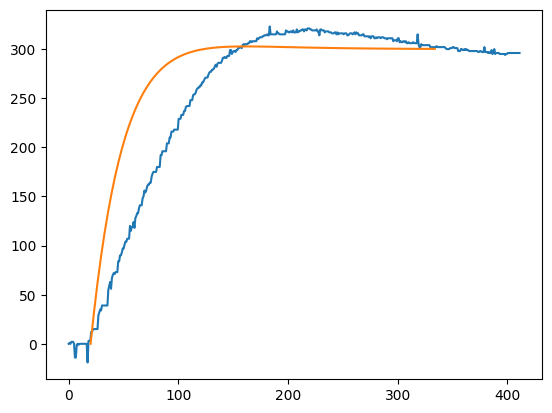

In [309]:
# obter_comparacao(
#     {'sinal SC':sinais[0]}, 
#     {'sistema calculado ': [malha_fechada.num, malha_fechada.den]}, 
#     x_start=0, y_start=0, x='tempo', y='SC', xlim=500, ylim=500, show=False)


degrau_empirico({'sinal SC':sinais[0]}, x_start=0, y_start=0, x='tempo', y='VP', xlim=500, ylim=500, show=False)
degrau_simulado({'sistema calculado ': [malha_fechada.num, malha_fechada.den]}, x_start=20, y_start=0, xlim=500, ylim=500, show=False, step=300)

## <font style='font-size: 30px;'> Funções sob medida </font> <hr style='line: 2px solid;'>

In [227]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.lines as mlines
import scipy.signal as signal
import numpy as np
import pandas as pd
import control as ct
import scipy as sp
import warnings
import cmath


# Cálculos


def obter_conjulgados_dominantes(Mp, Ts):
    xi = -np.log(Mp) / np.sqrt(np.pi**2 + np.log(Mp)**2)
    wn = 4 / (Ts * xi)
    wd = wn * np.sqrt(1 - xi**2)
    pole1 = complex(-xi*wn, wd)
    pole2 = complex(-xi*wn, -wd)
    pole1 = np.round(pole1, decimals=3)  # Arredondar o polo1 para 3 casas decimais
    pole2 = np.round(pole2, decimals=3)  # Arredondar o polo2 para 3 casas decimais
    return [pole1, pole2]

def obter_defasagem_angular(num, den, s, get=False):

    # Obter os polos e zeros da função de transferência
    polos = np.roots(den)
    zeros = np.roots(num)
    
    # Adicionar um polo na origem
    polos = np.append(polos, 0)

    # Calcular a defasagem angular
    phi = np.pi
    
    # Calcular contribuição dos polos
    i = 1
    for polo in polos:
        angulo = np.angle(s - polo)
        if not get:
            print(f"{i}° Polo faz {angulo*(180/np.pi):.2f} com o S")
        phi -= angulo
        i += 1
    
    # Calcular contribuição dos zeros
    i = 1
    for zero in zeros:
        angulo = np.angle(s - zero)
        if not get:
            print(f"{i}° Zero faz {angulo*(180/np.pi):.2f} com o S")
        phi += angulo
        i += 1

    ang = round(-phi*180/np.pi,1)

    if get:
        return ang
    else:
        print(f" \n Zero precisa somar: {ang}")

def obter_controlador_pi(num, den, s, delta=0, phi_z=0, zero=None):

    # Calcular Zero
    if zero is None:
        phi_z = obter_defasagem_angular(num, den, s, get=True)
        z_pi = (s.imag/np.tan(phi_z * (np.pi/180))) - s.real
    else:
        z_pi = zero

    z_pi = z_pi+delta

    print(f"    → Zero: {(z_pi.real):.4f}")
    print(f"    → Ti : {1/z_pi:.4f}")

    # valorando a função transferência para s
    den_eval = np.polyval(den, s)
    den_eval = np.abs(den_eval)
    num_eval = np.polyval(num, s)
    num_eval = np.abs(num_eval)
    
    # valorando o contorlador PI para s
    den_eval_pi = np.abs(s)
    num_eval_pi = np.abs(s + z_pi + delta)

    # Cálculo do valor de k
    k = (den_eval * den_eval_pi)/(num_eval * num_eval_pi)
    print(f"    → Kc : {k:.4f}")
    print(f"    → BP : {(100/k)*10:.4f} \n    → Ti : {10*1/z_pi:.4f}")
    
    # Construção da função de transferência do controlador PI
    C_pi = ct.TransferFunction([k, k*z_pi], [1,0])
    G = ct.TransferFunction(num, den)
    C_pi_G = C_pi * G
    
    # Imprimir a função de transferência do controlador PI
    print(f"\n CONTROLADOR : \n {C_pi}")
    print(f"\n MALHA S/CONTROLADOR : \n {G}")
    print(f"\n MALHA C/CONTROLADOR : \n {C_pi_G}")

    return C_pi_G.num, C_pi_G.den

def obter_lugar_raizes(num, den):
    
    system = ct.TransferFunction(num, den)
    poles, zeros = ct.pzmap(system, plot=False)
    
    if len(poles) == 0:
        print("Não há polos no sistema.")
        return

    fig, ax = plt.subplots()

    # rlist, klist = ct.root_locus(system, plot=False)
    rlist, klist = ct.root_locus(system, plot=True, ax=ax)

    ax.plot(np.real(poles), np.imag(poles), 'rx', markersize=10, label='Polos')
    ax.plot(np.real(zeros), np.imag(zeros), 'bo', markersize=8, label='Zeros')

    plt.legend()
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.grid(True)
    plt.show()

    print("\n Polos : ")
    for polo in poles:
        print(f"{polo:.4f}")
    
    print("\n Zeros : ")
    for zero in zeros:
        print(f"{zero:.4f}")

    #print("\n Ganho crítico (ganho no ponto de ruptura):", np.abs(klist[-1]))


# Plots Degrau

def degrau_empirico(sinais, x_start=0, y_start=0, x='tempo', y='saida', xlim=100, ylim=100, show=True, interp1d=False, legend=True, plot=True):

    # Ainda precisa de implementação
    
    if interp1d:

        f = interp1d(x, y)

        # Encontra o valor mínimo de x
        x_min = np.min(x)
        x_max = np.max(x)

        # Cria um novo conjunto de pontos com maior resolução
        t_real = np.linspace(x_min, x_max, 1000)
        y_real = f(t_real)

    if plot:

        for chave, valor in sinais.items():
            tempo = valor[x]
            saida = valor[y]

            deslocamento_x = x_start - tempo[0]
            deslocamento_y = y_start - saida[0]

            plt.plot(tempo + deslocamento_x, saida + deslocamento_y, label=chave)
        return

    with plt.ioff():

        fig = plt.figure()
        ax = fig.add_subplot()

        ax.set_xlim(0, xlim)
        ax.set_ylim(0, ylim)

        for chave, valor in sinais.items():
            tempo = valor[x]
            saida = valor[y]

            deslocamento_x = x_start - tempo[0]
            deslocamento_y = y_start - saida[0]

            ax.plot(tempo + deslocamento_x, saida + deslocamento_y, label=chave)

        if legend:

            ax.set_xlabel(x)
            ax.set_ylabel(y)
            ax.set_title('Resposta ao degrau unitário')
            ax.grid()
            plt.legend()

        ax.set_xlim(0, xlim)
        ax.set_ylim(0, ylim)

    if show:
        plt.show()
    else:
        return ax

def degrau_simulado(sistemas, x_start=0, y_start=0, xlim=100, ylim=100, show=True, legend=True, plot=True, step=1):

    if plot:

        for nome, coeficientes in sistemas.items():
            num, den = coeficientes
            sys = ct.TransferFunction(num, den)
            tempo, resposta = ct.step_response(sys)
            
            deslocamento_x = x_start - tempo[0]
            deslocamento_y = y_start - resposta[0]
            
            plt.plot(tempo + deslocamento_x, step*(resposta + deslocamento_y), label=nome)
        return 

    with plt.ioff():

        fig, ax = plt.subplots(figsize=(10, 10))

        for nome, coeficientes in sistemas.items():
            num, den = coeficientes
            sys = ct.TransferFunction(num, den)
            tempo, resposta = ct.step_response(sys)
            
            deslocamento_x = x_start - tempo[0]
            deslocamento_y = y_start - resposta[0]
            
            ax.plot(tempo + deslocamento_x, resposta + deslocamento_y, label=nome)

        if legend:

            ax.set_xlabel('Tempo')
            ax.set_ylabel('Resposta ao Degrau')
            ax.set_title('Degrau')
            ax.grid(True)
            ax.legend()

        ax.set_xlim(0, xlim)
        ax.set_ylim(0, ylim)

    if show:
        plt.show()
    else:
        return ax

def degrau_simulado_info(sistemas, amortecimento=0.02):

    for name, coeficientes in sistemas.items():
        num, den = coeficientes
        
        # Construir o sistema a partir de num e den
        sistema = ct.TransferFunction(num, den)
        
        # Obter informações do degrau
        info_sistema = ct.step_info(sistema, SettlingTimeThreshold=amortecimento)
        df_sistema = pd.DataFrame.from_dict(info_sistema, orient='index', columns=[name])
        df_sistema.index.name = 'Parâmetro'

        # Adicionar erro
        e_ss_atual = float(f"{1 - float(df_sistema.at['SteadyStateValue', name])}")
        df_adicional = pd.DataFrame({name: [e_ss_atual]}, index=['Erro(%)'])
        df_sistema = pd.concat([df_sistema, df_adicional])
        
        # Arredondar para 4 decimais
        df_sistema = df_sistema.applymap(lambda x: f'{x:.4f}')
        print(f"\n {df_sistema}")

def obter_comparacao(sinais, sistemas, x_start=0, y_start=0, x='tempo', y='saida', xlim=100, ylim=100, show=True):

    fig = plt.figure()

    degrau_simulado(sistemas, x_start=x_start, y_start=y_start, xlim=xlim, ylim=ylim, plot=True)
    degrau_empirico(sinais, x_start=x_start, y_start=y_start, x=x, y=y, xlim=xlim, ylim=ylim, plot=True)

    plt.xlabel('Tempo')
    plt.ylabel('Resposta ao Degrau')
    plt.title('Comparação')
    plt.grid(True)



# Manipuladores


def obter_dados_estruturados2(nome_arquivo):

    # Carrega os dados do arquivo CSV para um DataFrame
    df_real = pd.read_csv(nome_arquivo, sep=';', header=None, decimal=',')

    # Criando as listas vazias para armazenar os arrays
    tempo_list = []
    saida_list = []
    estrutura_list = []

    # Variáveis para guardar os valores temporários
    tempo = []
    saida = []

    # Variável para armazenar o último valor da terceira coluna — que é a coluna que indica o degrau 6→7 ou 7→6
    last_val = df_real.iloc[0, 2]

    # Loop pelas linhas do DataFrame
    for i, row in df_real.iterrows():
        # Verifica se o valor da terceira coluna mudou — enquanto não tiver mudado, adicionamos no array.
        if row[2] != last_val:
            # Adiciona os arrays de tempo e saída nas respectivas listas
            tempo_list.append(np.array(tempo))
            saida_list.append(np.array(saida))
            # Cria o dicionário com a estrutura desejada
            estrutura = {'tempo': np.array(tempo), 'saida': np.array(saida)}
            estrutura_list.append(estrutura)
            # Reseta as variáveis de tempo e saída
            tempo = []
            saida = []
            # Atualiza o valor da terceira coluna
            last_val = row[2]
        # Adiciona os valores de tempo e saída aos arrays temporários
        tempo.append(row[0])
        saida.append(row[1])

    # Adiciona os últimos arrays de tempo e saída às listas
    tempo_list.append(np.array(tempo))
    saida_list.append(np.array(saida))
    # Cria o dicionário com a estrutura desejada para o último conjunto de dados
    estrutura = {'tempo': np.array(tempo), 'saida': np.array(saida)}
    estrutura_list.append(estrutura)

    return tempo_list, saida_list, estrutura_list

def interpolador_sinais(sinais, x_start=0, y_start=0):
    
    # Configurações do gráfico
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.title('Resposta ao degrau unitário')
    plt.grid()
    plt.legend()

    for chave, valor in sinais.items():
        
        # Extrai os valores de tempo e saída do sinal
        tempo = valor['tempo']
        saida = valor['saida']

        # Plota os valores experimentais (curva interpolada)
        f = interp1d(tempo, saida, fill_value='extrapolate')
        x_min = np.min(tempo)
        x_max = np.max(tempo)
        t_real = np.linspace(x_min, x_max, 1000)
        y_real = f(t_real)

        # Deslocamento necessário para alinhar os valores simulados com os valores experimentais
        deslocamento_x = x_start - tempo[0]
        deslocamento_y = y_start - saida[0]

        # Plota os valores simulados com a chave como label
        plt.plot(tempo + deslocamento_x, saida + deslocamento_y, label=chave)

    # Mostra a legenda e o gráfico
    plt.legend()
    plt.show()

def obter_dados_estruturados4(nome_arquivo):

    # Carrega os dados do arquivo CSV para um DataFrame
    df = pd.read_csv(nome_arquivo, sep=',')

    # Criando as listas vazias para armazenar os arrays
    tempo_list = []
    vp_list = []
    sc_list = []
    estrutura_list = []

    # Variáveis para guardar os valores temporários
    tempo = []
    vp = []
    sc = []

    # Loop pelas linhas do DataFrame
    for _, row in df.iterrows():
        # Adiciona os valores de tempo, VP e SC aos arrays temporários
        tempo.append(row[0])
        vp.append(row[1])
        sc.append(row[3])

    # Adiciona os arrays de tempo, VP e SC nas respectivas listas
    tempo_list.append(np.array(tempo))
    vp_list.append(np.array(vp))
    sc_list.append(np.array(sc))

    # Cria o dicionário com a estrutura desejada
    estrutura = {'tempo': np.array(tempo), 'VP': np.array(vp), 'SC': np.array(sc)}
    estrutura_list.append(estrutura)

    return tempo_list, vp_list, sc_list, estrutura_list


# Teste
